# Materialien zu <i>agla</i>

Autor: Holger Böttcher - hbomat@posteo.de

## Hyperbolische Geometrie 

##  Isometrien
<br>

In [1]:
%run agla/start

<br>
## Isometrien im *D*-Modell

Isometrische Abbildungen haben die Form (im Komplexen)

$\;\;\;  f(z) = \frac {a z+\bar{b}} {b z+\bar{a}},  \;\;\; g(z) = \frac {a\bar{z}+\bar{b}} {b \bar{z}+\bar{a}} \;\;\; $ mit $\;\;\; \left|\begin{matrix}a & \bar{b}\\ b & \bar{a}\end{matrix}\right| \gt 0$

Sie sind aus einfacheren Abbildungen zusammengesetzt, die Inversionen an hyperboli-<br>
schen Geraden darstellen. Aus geometrischen Überlegungen ist ableitbar:

Für die Inversion (Spiegelung) an einem Durchmesser des Einheitskreises ist
<br>
<br>
$ f(z) = \frac{c \bar{z}} {\bar{c}} ,  \;\;\;\quad n = -c\, i \;$  entspricht dem Normalenvektor der euklidischen Geraden, 
<br>
die den Durchmesser enthält
<br><br>
Für die Inversion an einem Kreisbogen ist
<br><br>
$ f(z) = \frac{c \bar{z} + i} {-i \bar{z} + \bar{c}} ,  \;\;\;\quad m = c\, i \;\;$  entspricht dem Mittelpunkt des Kreises, der den Bogen <br> enthält; sein Radius ist $ \sqrt{\vert m \vert ^2-1} \;\\$ ($m\;$ muss außerhalb des Einheitskreises liegen)

### Einige nützliche Funktionen 

In [2]:
def c2v(z):   # komplexe Zahl --> Vektor
    return v(re(z), im(z))  

def c2p(z):   # komplexe Zahl --> hyperbolischer Punkt
    return hPunkt(re(z), im(z))   

def v2c(v):   # Vektor --> komplexe Zahl
    return v.x + v.y*I            

In [3]:
# Hyperbolische Punkte

A = hPunkt(-0.2, 0.5); B = hPunkt(0.4, 0.1); OH = hPunkt(0, 0)
A.e, B.e, OH.e

(Vektor, Vektor, Vektor)

###  Inversion an an einem Durchmesser

In [4]:
d = hGerade(OH, A)
d.träger

Gerade

In [5]:
P = hPunkt(-0.6, 0.3)   # der zu spiegelnde hyperbolische Punkt
Q = d.inv(P)            # das Bild bei der Spiegelung (hyperbolischer Punkt)
Q.e.dez                 # der zugehörige euklidische Punkt mit dezimalen 
                        # Koorinaten

Vektor

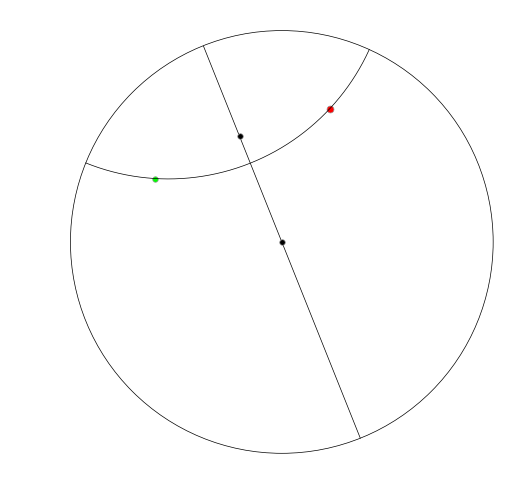

In [6]:
sicht_box(-1.1, 1.1)
zeichne(EinhKreis2, d, OH, A, [P, grün], [Q, rot, 2], hGerade(P, Q), achsen=nein)

### Inversion an an einem Kreisbogen <br>

In [7]:
k = hGerade(A, B)
k.träger

Kreis

In [8]:
Q1 = k.inv(P)              
Q1.e.dez 

Vektor

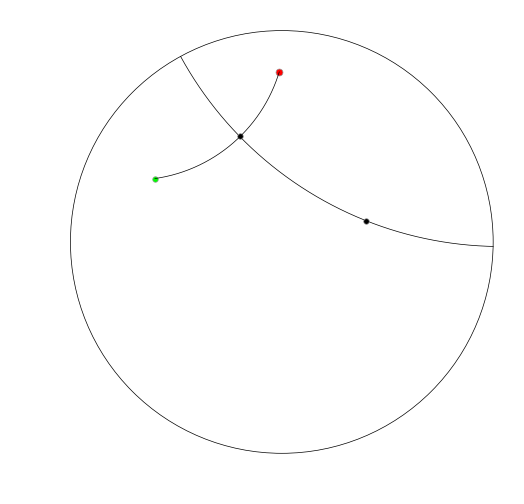

In [9]:
zeichne(EinhKreis2, k, A, B, [P, grün,], [Q1, rot, 2], hStrecke(P, Q1), achsen=nein)

### <br> Illustration, dass es sich um eine Spiegelung handelt

(Zweimaliges Spiegeln hintereinander ergibt die Identität)
<br><br>

In [10]:
P = hPunkt(0.56067, -0.341294)   # Urbild
Q = k.inv(P)                     # Spiegelbild          
P1 = k.inv(Q)                    # Bild des Spiegelbildes               
P1.e.dez , P.e.dez               # ist das Urbild

(Vektor, Vektor)

<br>
### Eine Isometrie zur Verschiebung des Ursprungs

$P(r, s) \; $  sei ein beliebiger Punkt innerhalb des Einheitskreises, dann überführt die
<br>folgende Isometrie $f$ den Ursprung in diesen Punkt

In [11]:
r, s = Symbol('r', real=True), Symbol('s', real=True)
a = (r-s)/(r^2+s^2) + (r+s)/(r^2+s^2)*I
b = 1+I

def f(z):
    return (a*conjugate(z)+conjugate(b)) / (b*conjugate(z)+conjugate(a))

f(z)

⎛ r - s    ⅈ⋅(r + s)⎞ _        
⎜─────── + ─────────⎟⋅z + 1 - ⅈ
⎜ 2    2     2    2 ⎟          
⎝r  + s     r  + s  ⎠          
───────────────────────────────
 r - s    ⅈ⋅(r + s)           _
─────── - ───────── + (1 + ⅈ)⋅z
 2    2     2    2             
r  + s     r  + s              

In [12]:
einfach(f(z))

        ⎛ 2    2⎞                       _
(1 - ⅈ)⋅⎝r  + s ⎠ + (r - s + ⅈ⋅(r + s))⋅z
─────────────────────────────────────────
                             ⎛ 2    2⎞ _ 
 r - s - ⅈ⋅(r + s) + (1 + ⅈ)⋅⎝r  + s ⎠⋅z 

In [13]:
det(v(a, b), v(conjugate(b), conjugate(a)))

     2      2    
- 2⋅r  - 2⋅s  + 2
─────────────────
      2    2     
     r  + s      

die Determinante ist positiv, da $\; r^2+s^2<1 \;$ ist
<br>

In [14]:
z = f(0)               # Bild des Ursprungs (komplexe Zahl)
c2v(f(0)).einfach      # zugehöriger Punkt

Vektorschar([r, s])

### Die inverse Isometrie 
$F$ wird in folgender Form gewonnen

In [15]:
d = Symbol('d')

F = lambda z: (c*z+conjugate(d))/(d*z+conjugate(c))
F(z), einfach(F(z))

⎛     c⋅(1 - ⅈ)        _                                             ⎞
⎜─────────────────── + d                                             ⎟
⎜ r - s    ⅈ⋅(r + s)                                                 ⎟
⎜─────── - ─────────                                                 ⎟
⎜ 2    2     2    2                 ⎛ 2    2⎞                       _⎟
⎜r  + s     r  + s        c⋅(1 - ⅈ)⋅⎝r  + s ⎠ + (r - s - ⅈ⋅(r + s))⋅d⎟
⎜───────────────────────, ───────────────────────────────────────────⎟
⎜     d⋅(1 - ⅈ)        _            ⎛ 2    2⎞                       _⎟
⎜─────────────────── + c  d⋅(1 - ⅈ)⋅⎝r  + s ⎠ + (r - s - ⅈ⋅(r + s))⋅c⎟
⎜ r - s    ⅈ⋅(r + s)                                                 ⎟
⎜─────── - ─────────                                                 ⎟
⎜ 2    2     2    2                                                  ⎟
⎝r  + s     r  + s                                                   ⎠

wobei $\; c,\; \bar{c}, \; d\; $ und $ \; \bar{d} \;$ die Elemente der Umkehrmatrix
$\; \left(\begin{matrix}c & \bar{d}\\ d & \bar{c}\end{matrix}\right) \;$ der zur 
<br>Abbildung $f$ gehörigen Matrix
$\; \left(\begin{matrix}a & \bar{b}\\ b & \bar{a}\end{matrix}\right) \;$ sind

In [16]:
M = v(a, b) | v(conjugate(b), conjugate(a))
M

⎡ r - s    ⅈ⋅(r + s)                     ⎤
⎢─────── + ─────────         1 - ⅈ       ⎥
⎢ 2    2     2    2                      ⎥
⎢r  + s     r  + s                       ⎥
⎢                                        ⎥
⎢                      r - s    ⅈ⋅(r + s)⎥
⎢       1 + ⅈ         ─────── - ─────────⎥
⎢                      2    2     2    2 ⎥
⎣                     r  + s     r  + s  ⎦

In [17]:
MI = M^-1
MI

⎡                         2                                                   
⎢                ⎛ 2    2⎞                              2    2                
⎢(1 - ⅈ)⋅(1 + ⅈ)⋅⎝r  + s ⎠ ⋅(r + ⅈ⋅r - s + ⅈ⋅s)        r  + s        -(1 - ⅈ)⋅
⎢────────────────────────────────────────────── + ─────────────────  ─────────
⎢                      2 ⎛     2      2    ⎞      r - s + ⅈ⋅(r + s)           
⎢   (r - s + ⅈ⋅(r + s)) ⋅⎝- 2⋅r  - 2⋅s  + 2⎠                         (r - s + 
⎢                                                                             
⎢                      ⎛ 2    2⎞                                              
⎢             -(1 + ⅈ)⋅⎝r  + s ⎠⋅(r + ⅈ⋅r - s + ⅈ⋅s)                          
⎢             ───────────────────────────────────────                         
⎢                                 ⎛     2      2    ⎞                         
⎣             (r - s + ⅈ⋅(r + s))⋅⎝- 2⋅r  - 2⋅s  + 2⎠                         

                              ⎤
⎛ 2    2⎞          

In [18]:
(M * MI).einfach   # Kontrolle

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

In [19]:
c, d = MI[0, 0], MI[1, 0]
c, d

⎛                         2                                                   
⎜                ⎛ 2    2⎞                              2    2                
⎜(1 - ⅈ)⋅(1 + ⅈ)⋅⎝r  + s ⎠ ⋅(r + ⅈ⋅r - s + ⅈ⋅s)        r  + s        -(1 + ⅈ)⋅
⎜────────────────────────────────────────────── + ─────────────────, ─────────
⎜                      2 ⎛     2      2    ⎞      r - s + ⅈ⋅(r + s)           
⎝   (r - s + ⅈ⋅(r + s)) ⋅⎝- 2⋅r  - 2⋅s  + 2⎠                         (r - s + 

                              ⎞
⎛ 2    2⎞                     ⎟
⎝r  + s ⎠⋅(r + ⅈ⋅r - s + ⅈ⋅s) ⎟
──────────────────────────────⎟
           ⎛     2      2    ⎞⎟
ⅈ⋅(r + s))⋅⎝- 2⋅r  - 2⋅s  + 2⎠⎠

In [20]:
def F(z): 
    return (c*z+conjugate(d)) / (d*z+conjugate(c))

Diese Abbildung überführt die Zahl $\;r+i s \;$ nach 0

In [21]:
einfach(F(r+s*I))

0


### Isometrisches Bild eines Dreiecks 

In [22]:
# Eine Abbildung wird gewählt

a, b = 2-5*I, -3+2*I

det(v(a, b), v(conjugate(b), conjugate(a)))

16

In [23]:
def f(z): 
    return (a*conjugate(z)+conjugate(b))/(b*conjugate(z)+conjugate(a))

f(z)

            (1 + ⅈ)⋅(2 - 5⋅ⅈ) 
-3 - 2⋅ⅈ + ───────────────────
            r - s    ⅈ⋅(r + s)
           ─────── + ─────────
            2    2     2    2 
           r  + s     r  + s  
──────────────────────────────
           (-3 + 2⋅ⅈ)⋅(1 + ⅈ) 
2 + 5⋅ⅈ + ─────────────────── 
           r - s    ⅈ⋅(r + s) 
          ─────── + ───────── 
           2    2     2    2  
          r  + s     r  + s   

In [24]:
# Das Dreieck

A = hPunkt(0.7, 0.1); B = hPunkt(-0.3, 0.5); C = hPunkt(0.6, 0.3)
dd = hDreieck(A, B, C)

In [25]:
# Das Bild des Dreiecks

zA, zB, zC = f(v2c(A.e)), f(v2c(B.e)), f(v2c(C.e))

AA, BB, CC = c2p(zA), c2p(zB), c2p(zC)

db = hDreieck(AA, BB, CC)

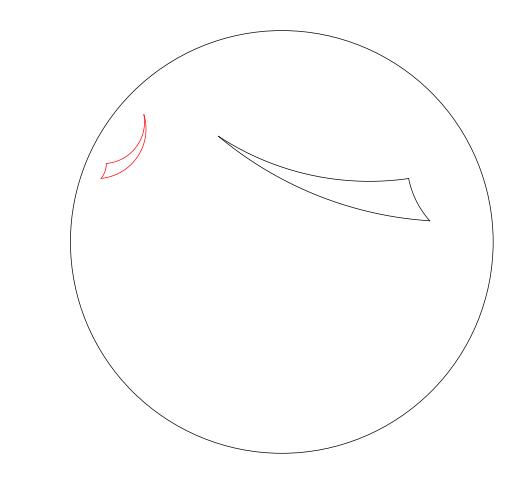

In [26]:
sicht_box(-1.1, 1.1)
zeichne(EinhKreis2, dd, [db, rot], achsen=nein)

In [27]:
# Die Dreiecke sind kongruent

dd.laengen

(2.42282916765166, 0.82887090230963, 2.77246987970995)

In [28]:
db.laengen

(2.42282916765166, 0.828870902309631, 2.77246987970995)

In [29]:
dd.winkel

(44.51650278910969, 6.671974785275454, 93.10003103564955)

In [30]:
db.winkel

(44.51650278910969, 6.671974785275454, 93.10003103564961)

In [31]:
dd.fläche, db.fläche

(0.623283105552501, 0.6232831055525)

<br>
##  Isometrien im *H*-Modell

Isometrische Abbildungen im $H$-Modell sind Parallelverschiebungen entlang der <br>$x$- bzw. $y$-Achse um eine Größe $d$ und Drehungen um die z-Achse um einen <br>Winkel $\phi$ mit den Matrizen

In [55]:
def M1(d):
    return Matrix(v(cosh(d), 0, sinh(d)), v(0, 1, 0), v(sinh(d), 0, cosh(d)))

def M2(d):
    return Matrix(v(1, 0, 0), v(0, cosh(d), sinh(d)), v(0, sinh(d), cosh(d)))
    
def M3(phi):    
    return Matrix(v(cos(phi), sin(phi), 0), v(-sin(phi), cos(phi), 0), v(0, 0, 1))

In [33]:
M1(d), M2(d), M3(phi)

⎛⎡    ⎛         ⎛ 2    2⎞                     ⎞           ⎛         ⎛ 2    2⎞ 
⎜⎢    ⎜ (1 + ⅈ)⋅⎝r  + s ⎠⋅(r + ⅈ⋅r - s + ⅈ⋅s) ⎟           ⎜ (1 + ⅈ)⋅⎝r  + s ⎠⋅
⎜⎢cosh⎜───────────────────────────────────────⎟   0  -sinh⎜───────────────────
⎜⎢    ⎜                    ⎛     2      2    ⎞⎟           ⎜                   
⎜⎢    ⎝(r - s + ⅈ⋅(r + s))⋅⎝- 2⋅r  - 2⋅s  + 2⎠⎠           ⎝(r - s + ⅈ⋅(r + s))
⎜⎢                                                                            
⎜⎢                      0                         1                        0  
⎜⎢                                                                            
⎜⎢     ⎛         ⎛ 2    2⎞                     ⎞         ⎛         ⎛ 2    2⎞  
⎜⎢     ⎜ (1 + ⅈ)⋅⎝r  + s ⎠⋅(r + ⅈ⋅r - s + ⅈ⋅s) ⎟         ⎜ (1 + ⅈ)⋅⎝r  + s ⎠⋅(
⎜⎢-sinh⎜───────────────────────────────────────⎟  0  cosh⎜────────────────────
⎜⎢     ⎜                    ⎛     2      2    ⎞⎟         ⎜                    
⎜⎣     ⎝(r - s + ⅈ⋅(r + s))⋅⎝- 2⋅r  - 2⋅s  + 2⎠⎠    

Diese Abbildungen lassen die quadratische Form  $\sigma$  invariant und erhalten somit 
die Metrik

In [34]:
x1, x2, y1, y2, z1, z2 = symbols('x_1, x_2, y_1 y_2, z_1, z_2')

In [35]:
P1 = v(x1, y1, z1); P2 = v(x2, y2, z2)   # 2 Punkte
P1, P2

(Vektorschar([z_1, y_1, x_1]), Vektorschar([x_2, z_2, y_2]))

In [36]:
def sigma(P, Q):             # die quadratische Form
    return -P.x*Q.x - P.y*Q.y + P.z*Q.z

sigma(P1, P2)

-x₁⋅x₂ - y₁⋅y₂ + z₁⋅z₂

In [37]:
PP, QQ = M1(d) * P1, M1(d) * P2; einfach(sigma(PP, QQ))   # Nachweis ...

-x₁⋅x₂ - y₁⋅y₂ + z₁⋅z₂

In [38]:
PP, QQ = M2(d) * P1, M2(d) * P2; einfach(sigma(PP, QQ))   # der ...

-x₁⋅x₂ - y₁⋅y₂ + z₁⋅z₂

In [39]:
PP, QQ = M3(phi) * P1, M3(phi) * P2; einfach(sigma(PP, QQ))   # Invarianz

-x₁⋅x₂ - y₁⋅y₂ + z₁⋅z₂

### Isometrische Dreiecke

In [40]:
A = hPunkt(0.2, -1, 'h')
B = hPunkt(0.5, 0.3,'h')
C = hPunkt(-2, 0.5, 'h')
A.e, B.e, C.e

(Vektor, Vektor, Vektor)

In [41]:
d = hDreieck(A, B, C)   # das Ausgangsdreieck

In [42]:
M1 = M1(1.7)   # Verschiebung entlang der x-Achse um 1.7

A1 = hPunkt(M1*A.e)
B1 = hPunkt(M1*B.e)
C1 = hPunkt(M1*C.e)

d1 = hDreieck(A1, B1, C1)

A1.e, B1.e, C1.e

# mit M2 kann analog verfahren werden


(Vektor, Vektor, Vektor)

In [56]:
M3 = M3(180)     # Drehung um die z-Achse um 180°

A3 = hPunkt(M3*A.e)
B3 = hPunkt(M3*B.e)
C3 = hPunkt(M3*C.e)

d3 = hDreieck(A3, B3, C3)

A3.e, B3.e, C3.e

(Vektor, Vektor, Vektor)

In [57]:
sicht_box(5)
zeichne([HypSchale, gelb], [d, 2], [d3, 2, rot])

Die drei Dreiecke sind in der Tat kongruent, ihre Seitenlängen und <br>Innenwinkel stimmen überein

In [49]:
d.längen

(1.92554989602509, 2.10701128138797, 1.22782338996751)

In [50]:
d1.längen

(1.92554989602513, 2.107011281388, 1.22782338996756)

In [51]:
d3.längen

(1.92554989602509, 2.10701128138797, 1.22782338996751)

In [52]:
d.winkel

(47.98528028840903, 63.72622990618886, 20.206238282279774)

In [53]:
d1.winkel

(47.98528028840857, 63.726229906187136, 20.206238282279774)

In [54]:
d3.winkel


(47.98528028840903, 63.72622990618886, 20.206238282279774)

<br>
## Parkettierung mit Fünfecken im *D*-Modell

siehe [Rosebrock]
<br><br>
Die Konstruktion ist gegenwärtig **SEHR** zeitaufwändig; es werden bei jedem Schritt <br>nur ein bis zwei Fünfecke hinzugefügt
<br>

In [58]:
# Das Fundamentaldreieck   [Rosebrock S150]

wia = pi/2; wib = pi/5; wic = pi/4

# Die Seitenlängen

# Die Berechnung erfolgt auf der Grundlage des Halbseitensatzes der 
# sphärischen Geometrie; R wird durch I ersetzt

s = 1/2 * (wia + wib + wic)

c = (N(abs(2*R*arctan(sqrt(-cos(s)*cos(s-wic)/cos(s-wia)/cos(s-wib)))))).subs(R, I)

a = (N(abs(2*R*arctan(sqrt(-cos(s)*cos(s-wia)/cos(s-wib)/cos(s-wic)))))).subs(R, I)

b = (N(abs(2*R*arctan(sqrt(-cos(s)*cos(s-wib)/cos(s-wia)/cos(s-wic)))))).subs(R, I)

a, b, c

(0.842482081462008, 0.530637530952518, 0.626869662906178)

In [59]:
# Die Eckpunkte

B = hPunkt(0, 0)

h = Symbol('h')
A = hPunkt(0, h); h = nsolve(A.abstand(B)-c, -0.5)
A = hPunkt(0, N(h))

t = Symbol('t')
g = Gerade(v(0, 0), v(1, tan(3/10*pi)))
C = hPunkt(g.pkt(t)); t = nsolve(C.abstand(B)-a, -0.5)
C = hPunkt(g.pkt(N(t)))

d = hDreieck(A, B, C)

A.e.dez, B.e, C.e.dez

(Vektor, Vektor, Vektor)

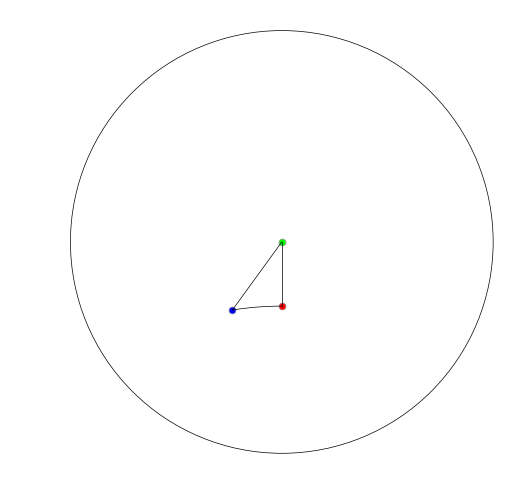

In [60]:
sicht_box(1.1)
zeichne(EinhKreis2, [A, rot, 2], [B, gruen, 2], [C, blau, 2], d, achsen=nein)

Aus diesem Dreieck kann durch Spiegelungen an den auf Durchmessern liegenden Seiten 
<br>das Ausgangs-5-Eck erzeugt werden
<br><br>
Hier wird es durch euklidische Drehungen des Eckpunktes $C$ erzeugt
<br>

In [61]:
# Das Ausgangs-5-Eck

ecken = [hPunkt(C.e.bild(drehung(O2, i*360/5), exakt=False)) for i in range(5)]
ecken += [ecken[0]]

In [62]:
seiten = [hStrecke(ecken[i], ecken[i+1]) for i in range(5)]

In [63]:
# Das Fünfeck ist regulär

[ecken[i].abstand(ecken[i+1]) for i in range(5)]

[1.0612750619050382, 1.061275061905038, 1.0612750619050377, 1.0612750619050382
, 1.0612750619050373]

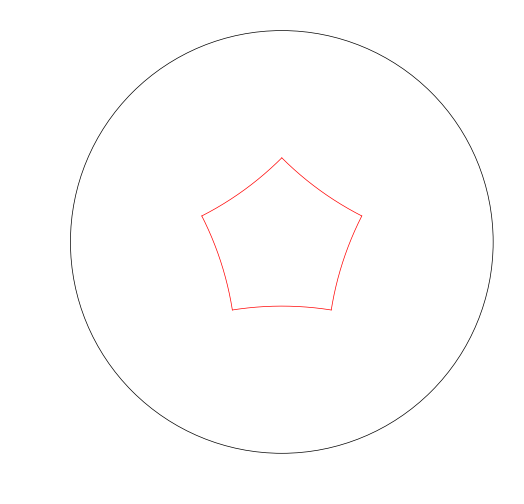

In [64]:
sicht_box(-1.1, 1.1)
zeichne(EinhKreis2, *[[seiten[i], rot] for i in range(5)], achsen=nein)

In [65]:
# Durch Inversion des Fünfecks an seinen Seiten wird die nächste  
# Generation von Fünfecken erzeugt

seiten0 = [seiten[0].gerade.inv(s) for s in seiten]   # Inversion an 
                                            # der 0. (unteren) Seite

In [66]:
seiten1 = [seiten[1].gerade.inv(s) for s in seiten]   # Inversion an 
                                       # der 1. (angrenzenden) Seite

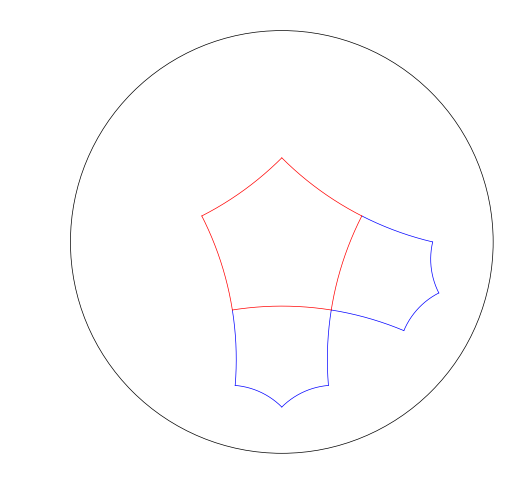

In [67]:
sicht_box(-1.1, 1.1)
zeichne(EinhKreis2, 
        [seiten0[1], blau],  [seiten0[2], blau],  [seiten0[3], blau],  [seiten0[4], blau],
        [seiten1[0], blau],  [seiten1[2], blau],  [seiten1[3], blau],  [seiten1[4], blau],
        *[[seiten[i], rot] for i in range(5)], achsen=nein)


In [68]:
g0 = [hGerade(ecken[i], ecken[i+1]) for i in range(5)]   # 0. Geraden-
                                                         # Generation

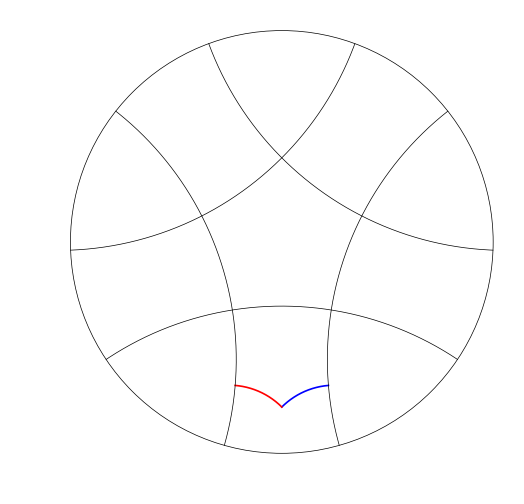

In [69]:
zeichne(EinhKreis2, [seiten0[2], blau, 2], [seiten0[3], rot, 2],
        *[g0[i] for i in range(5)], achsen=nein)

In [70]:
# 1. Geraden-Generation 

g10 = seiten0[3].gerade
g11 = seiten0[2].gerade

dr = drehung(O2, 360/5)
P0, Q0 = g10.e.pkt(30), g10.e.pkt(45)               # Punkte innerhalb 
PP0, QQ0 = hPunkt(P0.bild(dr)), hPunkt(Q0.bild(dr))
g12 = hGerade(PP0, QQ0)
P1, Q1 = g11.e.pkt(90), g11.e.pkt(120)              # des Einheitskreises
PP1, QQ1 = hPunkt(P1.bild(dr)), hPunkt(Q1.bild(dr)) 
g13 = hGerade(PP1, QQ1)

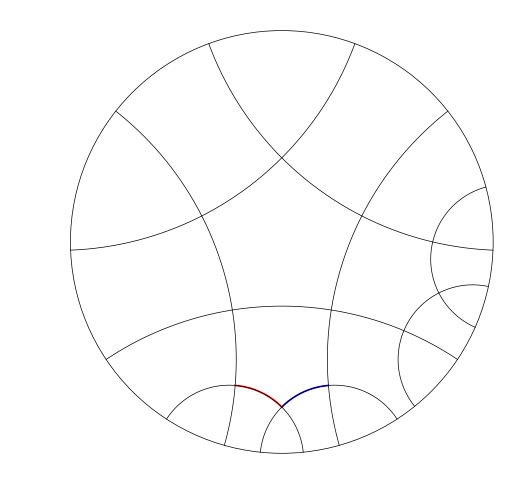

In [71]:
sicht_box(-1.1, 1.1)
zeichne(EinhKreis2, [seiten0[2], blau, 2], [seiten0[3], rot, 2],
        g10, g11, g12, g13,
        *[g0[i] for i in range(5)], achsen=nein)

In [72]:
# Zur Berechnung der 2. Geraden-Generation wird wieder invertiert

seiten_rot = [seiten0[3].gerade.inv(seiten0[i]) for i in range(5)]

In [73]:
seiten_blau = [seiten0[2].gerade.inv(seiten0[i]) for i in range(5)]

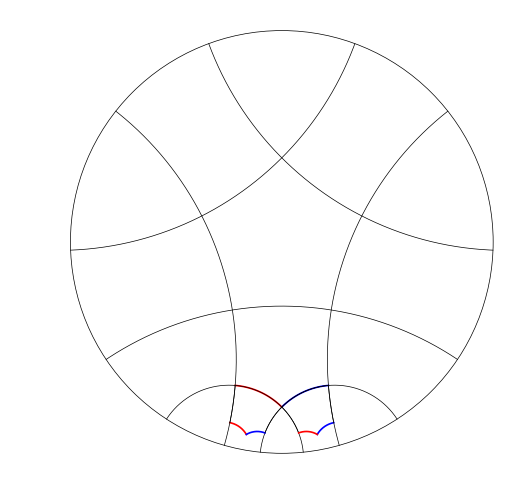

In [74]:
zeichne(EinhKreis2, [seiten0[2], blau, 2], [seiten0[3], rot, 2],
        g10, g11, 
        [seiten_rot[0], rot, 2], [seiten_rot[1], blau, 2], seiten_rot[2], seiten_rot[4],
        [seiten_blau[0], blau, 2], seiten_blau[1], seiten_blau[2], seiten_blau[3],  [seiten_blau[4], rot, 2],
        *[g0[i] for i in range(5)], achsen=nein)

In [75]:
g20 = seiten_rot[0].gerade
g21 = seiten_rot[1].gerade
g22 = seiten_blau[4].gerade
g23 = seiten_blau[0].gerade

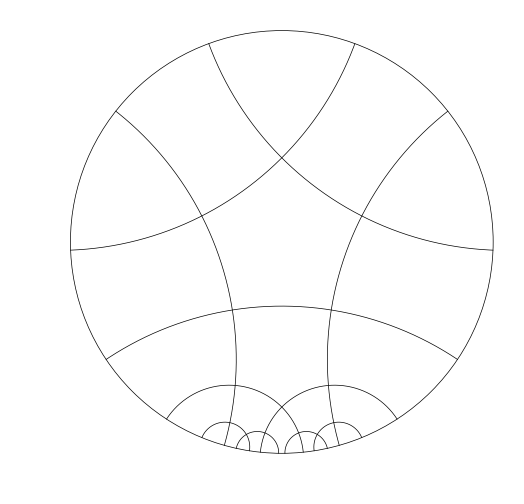

In [76]:
zeichne(EinhKreis2, 
        g10, g11,
        g20, g21, g22, g23,
        *[g0[i] for i in range(5)], achsen=nein)

In [77]:
# Überprüfung, dass die Spiegelung an einer "Seitenkante" ebenfalls zu einem 
# kongruenten Fünfeck führt

seiten2 = [seiten0[1].gerade.inv(seiten0[i]) for i in range(5)]

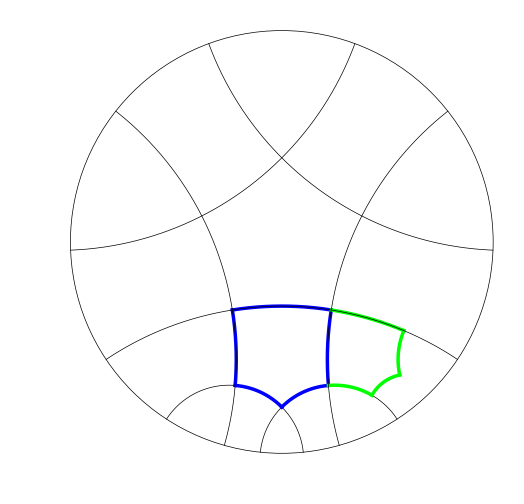

In [78]:
zeichne(EinhKreis2, 
        g10, g11,
        *[[seiten0[i], blau, 3] for i in range(5)], 
        *[[seiten2[i], grün, 3] for i in (0, 2, 3, 4)], 
        *[g0[i] for i in range(5)], achsen=nein)

<br>
### Anmerkung
Die verwendete Literatur ist mit der Hilfe-Funktion einsehbar 

In [53]:
#Hilfe(h=23)    # entfernen